In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Callable, Any

In [13]:
L = 3.0
left, right = -L, L
left_value, right_value = 1.0, 0.0


def H(x):
    H = np.empty(len(x), dtype=float)
    for i in range(len(x)):
        H[i] = 1.0 if x[i] > 0 else 0.0
    return H


def apply_boundary_conditions(u, n):
    u[n, 0] = left_value
    u[n, -1] = right_value

In [14]:
def get_solution(
        eps: float,
        a: float,
        H: Callable[[Any], Any],
        left: float,
        right: float,
        T: float,
        h: float,
        tau: float,
        apply_boundary_conditions: Callable[[Any, int], Any]
):
    x = np.arange(left, right + h, h)
    t = np.arange(0, T + tau, tau)
    u = np.zeros((len(t), len(x)))
    apply_boundary_conditions(u, 0)
    u[0, :] = np.ones(u.shape[1]) - H(x)

    for n in range(0, len(t) - 1):
        apply_boundary_conditions(u, n + 1)
        for i in range(1, len(x) - 1):
            u[n + 1, i] = u[n, i] + tau * (
                    eps * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2) -
                    a * ((u[n, i + 1] - u[n, i - 1]) / (2 * h))
            )

    return u, x

In [15]:
eps = 0.0
a = 1.0
T = 20
h = 0.05
tau = h ** 2 / (2 * abs(eps)) if eps != 0 else h ** 2 / 2

u, x = get_solution(
    eps=eps,
    a=a,
    H=H,
    left=left,
    right=right,
    T=T,
    h=h,
    tau=tau,
    apply_boundary_conditions=apply_boundary_conditions
)

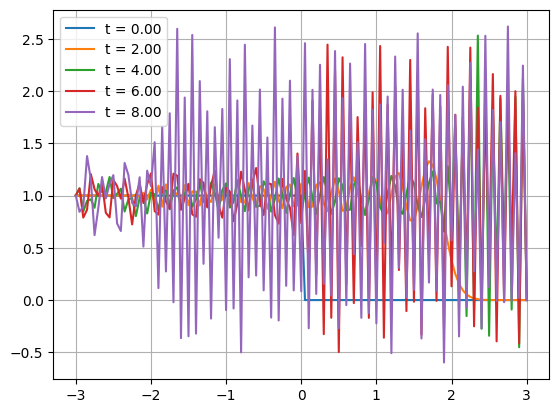

In [16]:
step_count = 10
times_to_plot = np.arange(0, T, T / step_count)
for t in times_to_plot[:5]:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# очисить все в папке for_gif
image_folder = 'for_gif'
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        file_path = os.path.join(image_folder, filename)
        os.remove(file_path)

# создать графики в папке for_gif
for t in np.arange(0, 12, 10 * tau):
    n = int(t / tau)
    plt.plot(x, u[n, :])
    plt.title(f'{eps = }, {a = }, t = {t:.6f}')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.ylim(-1, 3)
    plt.savefig(f'for_gif/{t:012.6f}.png')
    plt.close()

In [23]:
from PIL import Image
import os

image_folder = 'for_gif'
gif_path = 'animation1.gif'
images = []

for filename in sorted(os.listdir(image_folder)):
    if filename.endswith('.png'):  # Проверяем расширение файла
        file_path = os.path.join(image_folder, filename)
        images.append(Image.open(file_path))

if images:
    images[0].save(
        gif_path,
        save_all=True,
        append_images=images[1::10],
        duration=1,
        loop=0
    )